## Data Cleaning for Furniture and Appliances Store Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a= pd.read_excel(r"D:\PYTHON\Data Cleaning\Dataset for cleaning.xlsx",sheet_name = 'Data 1')

In [3]:
b = pd.read_excel(r"D:\PYTHON\Data Cleaning\Dataset for cleaning.xlsx",sheet_name = 'Data 2')

In [4]:
a.head()

,Customer ID,Customer Name,Order ID,Order Value,Product Category,Last Order Date
0,1026,NHGX Ltd,15920447,30436.0,TECH,"Tuesday,19 July 2011"
1,1027,ULSK LLP,50132497,20969,Technology,"Saturday,19 August 2000"
2,1031,WCLT Org,67664791,92834,FURNITURE,"Saturday,27 December 2008"
3,1042,ZHBK Pvt Ltd,60273390,60946.0,FURNITURE,"Wednesday,14 February 1990"
4,1047,GLQU Ltd,22601732,*,ELECTRICITY,"Friday,12 August 2005"


In [5]:
b.head()

,Customer ID,Add 1,Pin Code,no of time
0,1026,VO Street Orange Zone,11120,2
1,1027,XK Street Orange Zone,11106,2
2,1031,PV Street Orange Zone,11176,4
3,1042,HY Street Apple Zone,11262,1
4,1047,XH Street Apple Zone,11451,2


#### Checking for the customers who are not present in the b Dataframe

In [6]:
a[~a['Customer ID'].isin(b['Customer ID'])]

,Customer ID,Customer Name,Order ID,Order Value,Product Category,Last Order Date


#### Merge both the DataFrame on the basis of Customer ID

In [7]:
df=pd.merge(a,b,on='Customer ID',how='left')

In [8]:
df.isna().sum()

Customer ID         0
Customer Name       0
Order ID            0
Order Value         0
Product Category    0
Last Order Date     0
Add 1               0
Pin Code            0
no of time          0
dtype: int64

#### There are no null entries in any of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 490
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer ID       491 non-null    int64 
 1   Customer Name     491 non-null    object
 2   Order ID          491 non-null    int64 
 3   Order Value       491 non-null    object
 4   Product Category  491 non-null    object
 5   Last Order Date   491 non-null    object
 6   Add 1             491 non-null    object
 7   Pin Code          491 non-null    int64 
 8   no of time        491 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 38.4+ KB


#### From the above Output, it is evident  that field "Order Value" and "Last Order Date"  is not consistent as it has the object as data type which is supposed to be a Numeric and datetime repectively.

In [10]:
df['Last Order Date']= pd.to_datetime(df['Last Order Date'])

#### Checking for the Special characters in the Order Value Column

In [11]:
df['Order Value'][df['Order Value'].astype(str).str.contains('[^0-9.]')].unique()


array(['*', '/', '&', '(', '_', '-'], dtype=object)

In [12]:
df[df['Order Value'].astype(str).str.contains('[^0-9.]')]

,Customer ID,Customer Name,Order ID,Order Value,Product Category,Last Order Date,Add 1,Pin Code,no of time
4,1047,GLQU Ltd,22601732,*,ELECTRICITY,2005-08-12,XH Street Apple Zone,11451,2
28,1279,MZJL Ltd,14247752,*,ELECTRICITY,2019-09-26,LP Street Orange Zone,11438,1
31,1332,BLIW Org,20768568,*,ELECTRICITY,2006-04-18,YO Street Apple Zone,11425,2
36,1355,XZNM Org,27728319,*,TECH,2016-05-20,PS Street Apple Zone,11383,4
80,1725,FAXX LLP,22360848,/,FURNITURE,2010-04-07,EZ Street Orange Zone,11239,2
84,1736,PSXJ Pvt Ltd,26535512,/,ELECTRICITY,2014-06-22,WX Street Apple Zone,11381,1
118,2007,JEUQ Org,19419587,/,ELECTRICITY,2017-04-16,RM Street Orange Zone,11435,2
131,2128,CNWK Ltd,29562309,/,ELECTRICITY,2008-04-20,QA Street Apple Zone,11160,3
153,2298,MYHC Org,16818241,&,TECH,2015-12-18,CR Street Apple Zone,11448,4
193,2593,HGMB LLP,18990142,&,FURNITURE,2023-04-24,JL Street Orange Zone,11372,3


#### Converting all the special characters to null value to impute them with appropriate averages.

In [13]:
l=list(df['Order Value'][df['Order Value'].astype(str).str.contains('[^0-9.]')].unique())

In [14]:
l

['*', '/', '&', '(', '_', '-']

In [15]:
d={}
for x in l:
    d[x]=np.nan

In [16]:
d

{'*': nan, '/': nan, '&': nan, '(': nan, '_': nan, '-': nan}

In [17]:
df['Order Value'].replace(d,inplace=True)

In [18]:
df[df["Order Value"].isnull()]

,Customer ID,Customer Name,Order ID,Order Value,Product Category,Last Order Date,Add 1,Pin Code,no of time
4,1047,GLQU Ltd,22601732,NaN,ELECTRICITY,2005-08-12,XH Street Apple Zone,11451,2
28,1279,MZJL Ltd,14247752,NaN,ELECTRICITY,2019-09-26,LP Street Orange Zone,11438,1
31,1332,BLIW Org,20768568,NaN,ELECTRICITY,2006-04-18,YO Street Apple Zone,11425,2
36,1355,XZNM Org,27728319,NaN,TECH,2016-05-20,PS Street Apple Zone,11383,4
80,1725,FAXX LLP,22360848,NaN,FURNITURE,2010-04-07,EZ Street Orange Zone,11239,2
84,1736,PSXJ Pvt Ltd,26535512,NaN,ELECTRICITY,2014-06-22,WX Street Apple Zone,11381,1
118,2007,JEUQ Org,19419587,NaN,ELECTRICITY,2017-04-16,RM Street Orange Zone,11435,2
131,2128,CNWK Ltd,29562309,NaN,ELECTRICITY,2008-04-20,QA Street Apple Zone,11160,3
153,2298,MYHC Org,16818241,NaN,TECH,2015-12-18,CR Street Apple Zone,11448,4
193,2593,HGMB LLP,18990142,NaN,FURNITURE,2023-04-24,JL Street Orange Zone,11372,3


In [19]:
pd.pivot_table(data=df, index=['Product Category'],values=['Order Value'],aggfunc="mean")

,Order Value
Product Category,
ELEC,43764.000000
ELECTRICITY,47301.659864
FUR,52132.000000
FURNITURE,48811.364486
TECH,48811.048544
Technology,50089.600000


#### There are different naming followed for the category attributes, So cleaning the Product Category column

In [20]:
df['Product Category'].unique()

array(['TECH', 'Technology', 'FURNITURE', 'ELECTRICITY', 'ELEC', 'FUR'],
      dtype=object)

In [21]:
def naming(a):
    if a.lower().startswith("t"):
        return "TECHNOLOGY"
    elif a.lower().startswith("f"):
        return "FURNITURE"
    else :
        return "ELECTRICITY"

In [22]:
df['Product Category']=df['Product Category'].apply(naming)

In [23]:
df['Product Category'].unique()

array(['TECHNOLOGY', 'FURNITURE', 'ELECTRICITY'], dtype=object)

#### Finding the Average Order Value for Each Product Category

In [24]:
Average = pd.pivot_table(data=df, index=['Product Category'],values=['Order Value'],aggfunc="mean").round(2).reset_index()

In [25]:
Average

,Product Category,Order Value
0,ELECTRICITY,47230.91
1,FURNITURE,48842.11
2,TECHNOLOGY,48870.24


#### Merging both the dataframe's to add the Average order Value of Different Category

In [26]:
df=pd.merge(df,Average, on='Product Category',how='left')

#### Imputing the null entries with Average values

In [27]:
#df['Order Value_x']= df.apply(lambda x :x['Order Value_y'] if pd.isna(x['Order Value_x']) else x['Order Value_x'],axis=1)

df['Order Value_x']=df['Order Value_x'].fillna(df['Order Value_y'])

#### Removing the average column after imputing the null entries.

In [28]:
df.drop(['Order Value_y'],axis=1,inplace=True)

In [29]:
df.rename(columns={"Order Value_x":"Order Value"},inplace =True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 490
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       491 non-null    int64         
 1   Customer Name     491 non-null    object        
 2   Order ID          491 non-null    int64         
 3   Order Value       491 non-null    float64       
 4   Product Category  491 non-null    object        
 5   Last Order Date   491 non-null    datetime64[ns]
 6   Add 1             491 non-null    object        
 7   Pin Code          491 non-null    int64         
 8   no of time        491 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 38.4+ KB


#### All the Columns data type has been corrected as per the  Domain of the attributes.

In [31]:
df.head()

,Customer ID,Customer Name,Order ID,Order Value,Product Category,Last Order Date,Add 1,Pin Code,no of time
0,1026,NHGX Ltd,15920447,30436.00,TECHNOLOGY,2011-07-19,VO Street Orange Zone,11120,2
1,1027,ULSK LLP,50132497,20969.00,TECHNOLOGY,2000-08-19,XK Street Orange Zone,11106,2
2,1031,WCLT Org,67664791,92834.00,FURNITURE,2008-12-27,PV Street Orange Zone,11176,4
3,1042,ZHBK Pvt Ltd,60273390,60946.00,FURNITURE,1990-02-14,HY Street Apple Zone,11262,1
4,1047,GLQU Ltd,22601732,47230.91,ELECTRICITY,2005-08-12,XH Street Apple Zone,11451,2


#### Extracting the Zone from the Add 1 Column

In [34]:
df["Zone"]= df['Add 1'].apply(lambda x : " ".join(x.split(" ")[-2:]))

In [35]:
df.Zone.unique()

array(['Orange Zone', 'Apple Zone'], dtype=object)

In [36]:
df.head()

,Customer ID,Customer Name,Order ID,Order Value,Product Category,Last Order Date,Add 1,Pin Code,no of time,Zone
0,1026,NHGX Ltd,15920447,30436.00,TECHNOLOGY,2011-07-19,VO Street Orange Zone,11120,2,Orange Zone
1,1027,ULSK LLP,50132497,20969.00,TECHNOLOGY,2000-08-19,XK Street Orange Zone,11106,2,Orange Zone
2,1031,WCLT Org,67664791,92834.00,FURNITURE,2008-12-27,PV Street Orange Zone,11176,4,Orange Zone
3,1042,ZHBK Pvt Ltd,60273390,60946.00,FURNITURE,1990-02-14,HY Street Apple Zone,11262,1,Apple Zone
4,1047,GLQU Ltd,22601732,47230.91,ELECTRICITY,2005-08-12,XH Street Apple Zone,11451,2,Apple Zone


#### Adding the Year with month and month name columns

In [37]:
df['Year_Month']=df['Last Order Date'].dt.strftime("%Y-%m")
df['Month']=df['Last Order Date'].dt.month_name()

#### Data is Cleaned for the Exploratory Data Analysis

Text(0, 0.5, 'Order value')

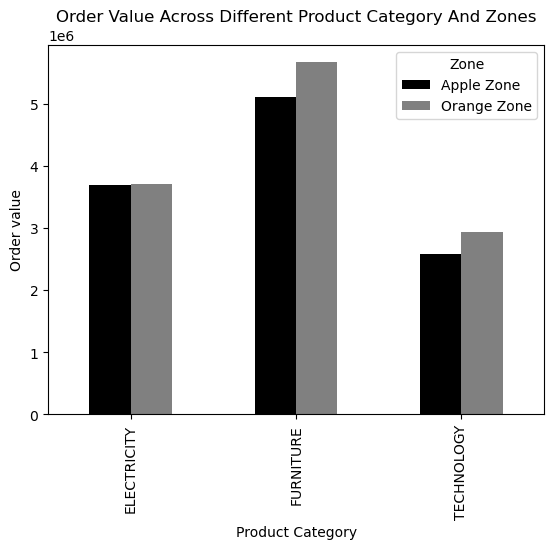

In [39]:
pd.pivot_table(data=df,index='Product Category',columns='Zone',values='Order Value',aggfunc='sum').plot(kind='bar',
color=['black','gray'])
plt.title('Order Value Across Different Product Category And Zones')
plt.xlabel('Product Category')
plt.ylabel('Order value')

Text(0, 0.5, 'Order Value')

<Figure size 1000x500 with 0 Axes>

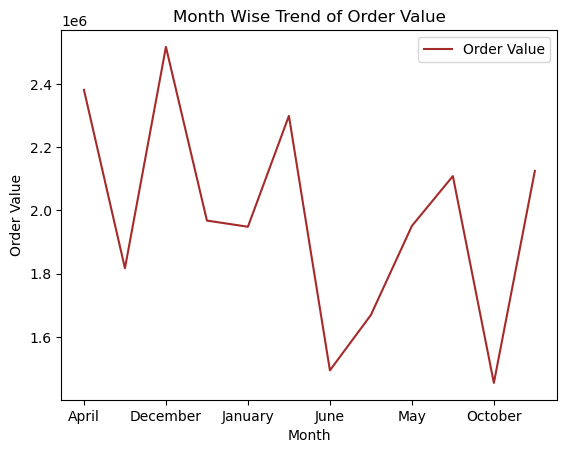

In [40]:
plt.figure(figsize=(10,5))
pd.pivot_table(data=df,index='Month',values='Order Value',aggfunc='sum').plot(kind='line',color='brown')
plt.title('Month Wise Trend of Order Value')
plt.xlabel('Month')
plt.ylabel('Order Value')

Text(0, 0.5, 'Customers')

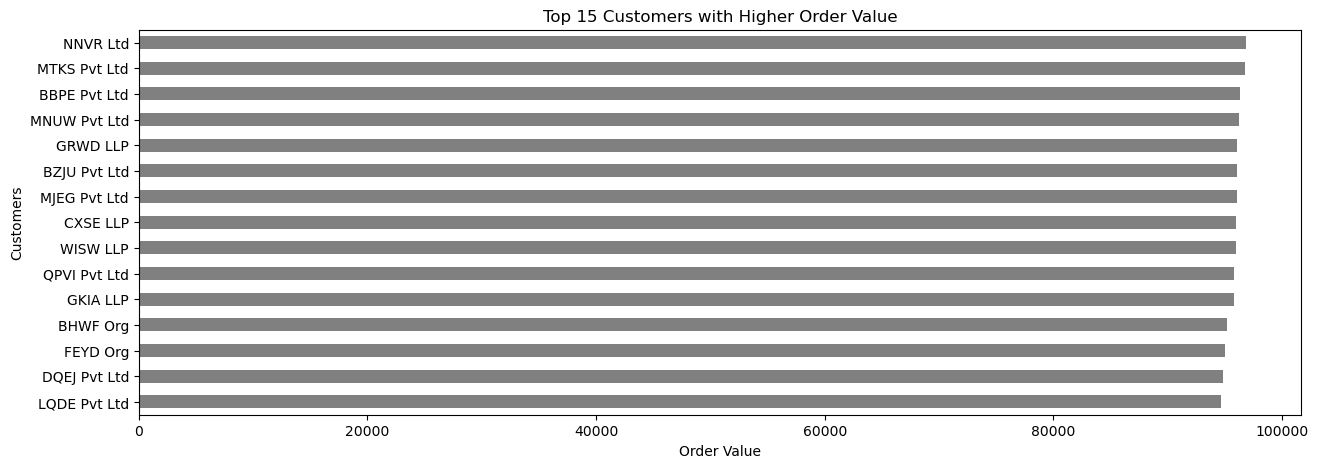

In [99]:
pd.pivot_table(data=df,index='Customer Name',values='Order Value',aggfunc='sum').sort_values(by='Order Value',
               ascending=False).head(15).plot(kind='barh' ,figsize=(15,5), color='gray', legend=False)
plt.gca().invert_yaxis() 
plt.title('Top 15 Customers with Higher Order Value')
plt.xlabel('Order Value')
plt.ylabel('Customers')

 ## Thank You